## Exercise Based on Machine Learning Workflow

In [1]:
import torch ,matplotlib.pyplot as plt
from torch import nn

In [2]:
X = torch.arange(start=0.01 , end=1 , step=0.01)

X , len(X)

(tensor([0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800, 0.0900,
         0.1000, 0.1100, 0.1200, 0.1300, 0.1400, 0.1500, 0.1600, 0.1700, 0.1800,
         0.1900, 0.2000, 0.2100, 0.2200, 0.2300, 0.2400, 0.2500, 0.2600, 0.2700,
         0.2800, 0.2900, 0.3000, 0.3100, 0.3200, 0.3300, 0.3400, 0.3500, 0.3600,
         0.3700, 0.3800, 0.3900, 0.4000, 0.4100, 0.4200, 0.4300, 0.4400, 0.4500,
         0.4600, 0.4700, 0.4800, 0.4900, 0.5000, 0.5100, 0.5200, 0.5300, 0.5400,
         0.5500, 0.5600, 0.5700, 0.5800, 0.5900, 0.6000, 0.6100, 0.6200, 0.6300,
         0.6400, 0.6500, 0.6600, 0.6700, 0.6800, 0.6900, 0.7000, 0.7100, 0.7200,
         0.7300, 0.7400, 0.7500, 0.7600, 0.7700, 0.7800, 0.7900, 0.8000, 0.8100,
         0.8200, 0.8300, 0.8400, 0.8500, 0.8600, 0.8700, 0.8800, 0.8900, 0.9000,
         0.9100, 0.9200, 0.9300, 0.9400, 0.9500, 0.9600, 0.9700, 0.9800, 0.9900]),
 99)

In [3]:
weight , bias = 0.3 , 0.9

In [4]:
y = bias + (X*weight)
y

tensor([0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240, 0.9270,
        0.9300, 0.9330, 0.9360, 0.9390, 0.9420, 0.9450, 0.9480, 0.9510, 0.9540,
        0.9570, 0.9600, 0.9630, 0.9660, 0.9690, 0.9720, 0.9750, 0.9780, 0.9810,
        0.9840, 0.9870, 0.9900, 0.9930, 0.9960, 0.9990, 1.0020, 1.0050, 1.0080,
        1.0110, 1.0140, 1.0170, 1.0200, 1.0230, 1.0260, 1.0290, 1.0320, 1.0350,
        1.0380, 1.0410, 1.0440, 1.0470, 1.0500, 1.0530, 1.0560, 1.0590, 1.0620,
        1.0650, 1.0680, 1.0710, 1.0740, 1.0770, 1.0800, 1.0830, 1.0860, 1.0890,
        1.0920, 1.0950, 1.0980, 1.1010, 1.1040, 1.1070, 1.1100, 1.1130, 1.1160,
        1.1190, 1.1220, 1.1250, 1.1280, 1.1310, 1.1340, 1.1370, 1.1400, 1.1430,
        1.1460, 1.1490, 1.1520, 1.1550, 1.1580, 1.1610, 1.1640, 1.1670, 1.1700,
        1.1730, 1.1760, 1.1790, 1.1820, 1.1850, 1.1880, 1.1910, 1.1940, 1.1970])

In [5]:
train_split = int(0.8*len(X))

X_train , y_train = X[:train_split] , y[:train_split]
X_test , y_test = X[train_split:] , y[train_split:]

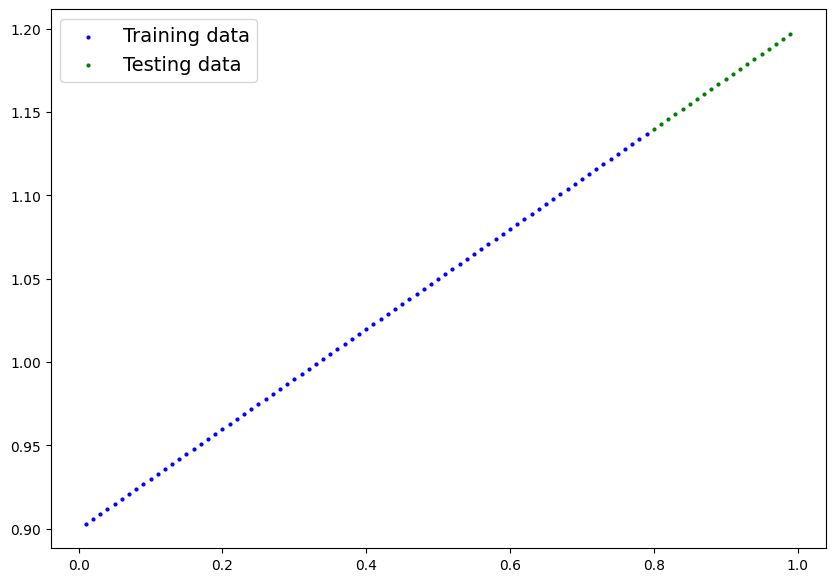

In [6]:
import plot_predictions

plot_predictions.plot_data(X_train , y_train , X_test , y_test)

In [7]:
class LinearRegression(nn.Module):

    def __init__(self):
        super().__init__()

        self.weight = nn.Parameter(torch.rand(1 , requires_grad=True , dtype=torch.float))
        self.bias = nn.Parameter(torch.rand(1 , requires_grad=True , dtype=torch.float))

    def forward(self , X:torch.tensor) -> torch.tensor:
        return self.bias + (self.weight * X)
    

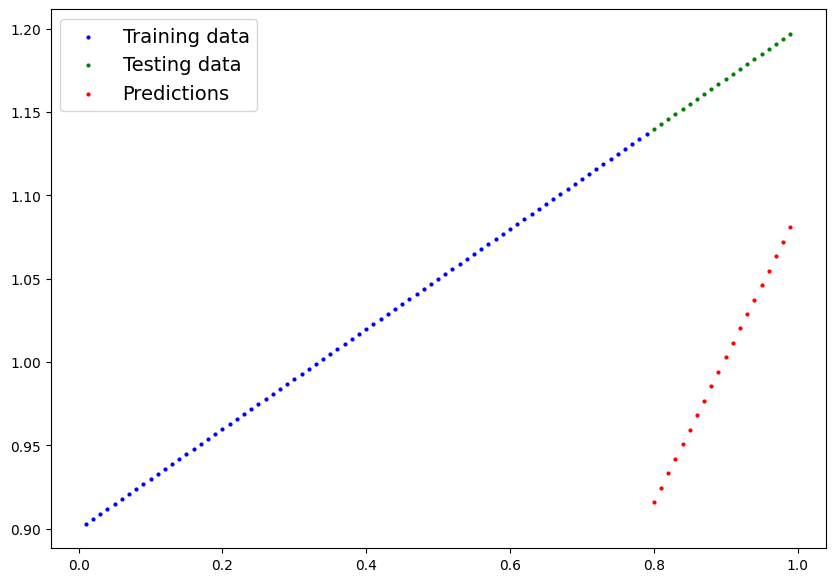

In [8]:
model = LinearRegression()

model.eval()
with torch.inference_mode():
    preds = model(X_test)

plot_predictions.plot_data(X_train , y_train , X_test , y_test , preds)

In [9]:
model.state_dict()

OrderedDict([('weight', tensor([0.8685])), ('bias', tensor([0.2211]))])

In [10]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters() , lr=0.01)

In [11]:
epochs = 300

for epoch in range(epochs):

    model.train()

    pred = model(X_train)

    loss = loss_fn(y_train , pred)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()


    if epoch % 20 == 0:
        model.eval()
        with torch.inference_mode():
            test_pred = model(X_test)
        
        test_loss = loss_fn(y_test , test_pred)

    print(f"Epoch : {epoch} | Loss : {loss} | Test_Loss : {test_loss}")

Epoch : 0 | Loss : 0.45145657658576965 | Test_Loss : 0.15645410120487213
Epoch : 1 | Loss : 0.43985652923583984 | Test_Loss : 0.15645410120487213
Epoch : 2 | Loss : 0.4282565116882324 | Test_Loss : 0.15645410120487213
Epoch : 3 | Loss : 0.4166565537452698 | Test_Loss : 0.15645410120487213
Epoch : 4 | Loss : 0.4050564765930176 | Test_Loss : 0.15645410120487213
Epoch : 5 | Loss : 0.39345651865005493 | Test_Loss : 0.15645410120487213
Epoch : 6 | Loss : 0.3818565309047699 | Test_Loss : 0.15645410120487213
Epoch : 7 | Loss : 0.37025654315948486 | Test_Loss : 0.15645410120487213
Epoch : 8 | Loss : 0.3586565852165222 | Test_Loss : 0.15645410120487213
Epoch : 9 | Loss : 0.3470565676689148 | Test_Loss : 0.15645410120487213
Epoch : 10 | Loss : 0.33545657992362976 | Test_Loss : 0.15645410120487213
Epoch : 11 | Loss : 0.32385656237602234 | Test_Loss : 0.15645410120487213
Epoch : 12 | Loss : 0.3122565746307373 | Test_Loss : 0.15645410120487213
Epoch : 13 | Loss : 0.30065658688545227 | Test_Loss : 0

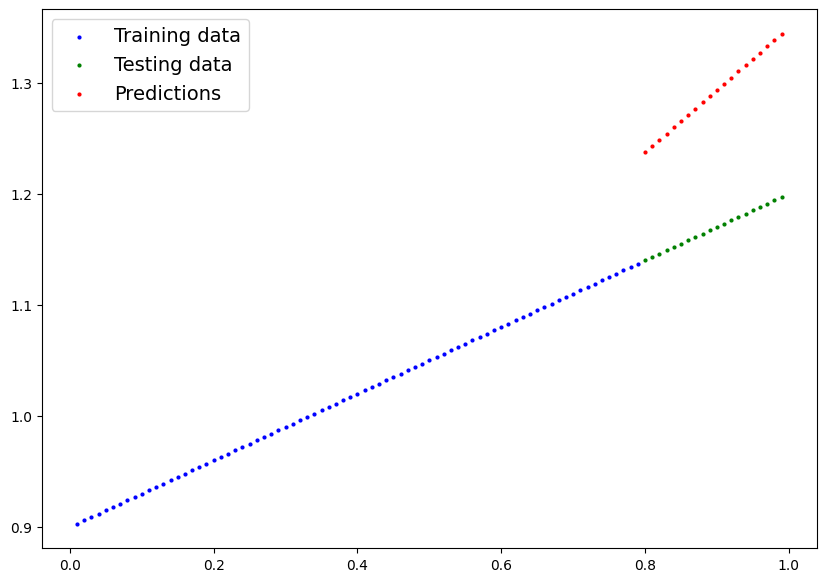

In [12]:
model.eval()
with torch.inference_mode():
    preds = model(X_test)

plot_predictions.plot_data(X_train , y_train , X_test , y_test , preds)

In [13]:
model.state_dict()

OrderedDict([('weight', tensor([0.5621])), ('bias', tensor([0.7875]))])

In [14]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True , exist_ok=True)

MODEL_NAME = "03_Linear_Regression.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model.state_dict() , f=MODEL_SAVE_PATH)